<a href="https://colab.research.google.com/github/rodhipranoto/Final-Project-Data-Science---KelasWork/blob/main/Case_Study_04_Deep_Learning_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: bersihin mount & kredensial lama
from google.colab import drive
try:
    drive.flush_and_unmount()
    print("Unmounted existing Drive.")
except Exception as e:
    print("No existing mount to unmount.")

# hapus folder mount & cache kredensial yang bikin konflik
!rm -rf /content/drive
!rm -rf /root/.config/Google
!rm -rf /root/.config/drivefs
print("Cleaned old Drive cache.")

Drive not mounted, so nothing to flush and unmount.
Unmounted existing Drive.
Cleaned old Drive cache.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

drive_path = "/content/drive/MyDrive/Data science/Klass Work/Proyek/Data Science (1)"
print("Isi folder:", os.listdir(drive_path))

Isi folder: ['Automobile Sales Data.csv', 'Final Project Data Science.pptx', 'Case_Study_01_Sales_Force_Training.ipynb', 'Case_Study_02_Housing_Price.ipynb', 'Case_Study_03_Machine_Learning.ipynb', 'archive.zip', 'VehiclesDetectionDataset', 'TestVideo', '.git']


In [4]:
import zipfile

zip_path = drive_path + "/archive.zip"
extract_path = "/content/archive"  # hasil ekstrak ditaruh di sini

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Isi folder setelah ekstrak:", os.listdir(extract_path))


Isi folder setelah ekstrak: ['VehiclesDetectionDataset', 'TestVideo']


In [5]:
dataset_path = os.path.join(extract_path, "VehiclesDetectionDataset")
testvideo_path = os.path.join(extract_path, "TestVideo")

print("Isi VehiclesDetectionDataset:", os.listdir(dataset_path))
print("Isi TestVideo:", os.listdir(testvideo_path))


Isi VehiclesDetectionDataset: ['train', 'valid', 'dataset.yaml', 'test']
Isi TestVideo: ['TrafficPolice.mp4']


In [6]:
with open(os.path.join(dataset_path, "dataset.yaml"), "r") as f:
    print(f.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']

#roboflow:
  #url: https://universe.roboflow.com/roboflow-gw7yv/vehicles-openimages/dataset/1


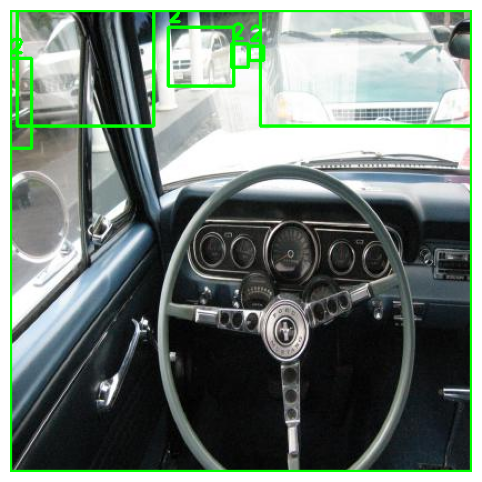

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

# path ke folder dataset
img_dir = "archive/VehiclesDetectionDataset/train/images"
label_dir = "archive/VehiclesDetectionDataset/train/labels"

# ambil 1 contoh file
img_file = os.listdir(img_dir)[0]
label_file = img_file.replace(".jpg", ".txt")

# load image
img_path = os.path.join(img_dir, img_file)
img = cv2.imread(img_path)
h, w, _ = img.shape

# baca label YOLO (class, x_center, y_center, width, height) format
with open(os.path.join(label_dir, label_file), "r") as f:
    for line in f:
        cls, x, y, bw, bh = map(float, line.strip().split())
        x1 = int((x - bw/2) * w)
        y1 = int((y - bh/2) * h)
        x2 = int((x + bw/2) * w)
        y2 = int((y + bh/2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, str(int(cls)), (x1, y1-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

# tampilkan
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


#TRAINING DATASET

In [8]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00


In [9]:
from ultralytics import YOLO
import os

dataset_path = "/content/archive/VehiclesDetectionDataset"

# pakai YOLOv8n (versi kecil, lebih cepat), bisa diganti "yolov8s.pt" kalau mau lebih akurat
model = YOLO("yolov8n.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model.train(
    data=os.path.join(dataset_path, "dataset.yaml"),
    epochs=5123,      # jumlah epoch (bisa disesuaikan, 30-50 bagus untuk awal)
    imgsz=640,      # ukuran input gambar
    batch=16        # batch size (atur sesuai GPU)
)


Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/archive/VehiclesDetectionDataset/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5123, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    752287  ultralytics.nn.modules.head.Detect           [5, [64, 128, 256]]           
Model summary: 129 layers, 3,011,823 parameters, 3,011,807 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 825.6±430.3 MB/s, size: 29.7 KB)


train: Scanning /content/archive/VehiclesDetectionDataset/train/labels... 878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:00<00:00, 947.00it/s]

train: New cache created: /content/archive/VehiclesDetectionDataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.1 ms, read: 702.5±271.5 MB/s, size: 33.0 KB)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /content/archive/VehiclesDetectionDataset/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<00:00, 1363.85it/s]


val: New cache created: /content/archive/VehiclesDetectionDataset/valid/labels.cache


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5123 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/5123         0G      1.027      3.226      1.331         42        640: 100%|██████████| 55/55 [15:14<00:00, 16.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 7/8 [01:33<00:13, 13.50s/it]

In [ ]:
model.val()


In [ ]:
results = model.predict(source="/content/archive/TestVideo/TrafficPolice.mp4", show=True, save=True)


In [ ]:
import matplotlib.pyplot as plt
import cv2

# Path ke results.png
img_path = "/content/runs/detect/train/results.png"

# Baca dan tampilkan
img = cv2.imread(img_path)
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


train/box_loss → loss prediksi bounding box saat training.

Semakin kecil semakin bagus → model makin tepat menggambar kotak objek.

train/cls_loss → loss klasifikasi label objek.

Turun berarti model makin tepat mengklasifikasikan (Car, Bus, Truck, dll).

train/dfl_loss → Distribution Focal Loss (untuk prediksi bounding box yang lebih halus).

Sama: makin turun makin bagus.

metrics/precision(B) → ketepatan prediksi (berapa banyak prediksi yang benar dari semua prediksi positif).

Naik = lebih sedikit false positive.

metrics/recall(B) → kemampuan menemukan semua objek yang ada.

Naik = lebih sedikit objek terlewat (false negative).

val/box_loss → box loss pada data validasi.

Jika terlalu jauh dari train/box_loss → indikasi overfitting.

val/cls_loss → classification loss di validasi.

Harus ikut turun, kalau naik → model tidak generalisasi dengan baik.

val/dfl_loss → distribution focal loss di validasi.

metrics/mAP50(B) → mean Average Precision pada IoU 50%.

Semakin tinggi → makin bagus kualitas deteksi.

metrics/mAP50-95(B) → mAP rata-rata pada berbagai threshold IoU (50–95%).

Lebih ketat daripada mAP50 → indikator utama performa model.

In [ ]:
img_path = "/content/runs/detect/train/confusion_matrix.png"

img = cv2.imread(img_path)
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


# distribusi dataset

In [ ]:
import os
import matplotlib.pyplot as plt

# Path labels train
train_labels_path = "/content/archive/VehiclesDetectionDataset/train/labels"

# Daftar class sesuai dataset.yaml
classes = ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']

# Hitung jumlah bounding box per class
class_counts = {c: 0 for c in classes}

for label_file in os.listdir(train_labels_path):
    with open(os.path.join(train_labels_path, label_file)) as f:
        lines = f.readlines()
        for line in lines:
            class_id = int(line.split()[0])
            class_counts[classes[class_id]] += 1

# Plot distribusi
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Distribusi Class Kendaraan (Train Dataset)")
plt.ylabel("Jumlah Bounding Box")
plt.xticks(rotation=30)
plt.show()


Car mendominasi dataset dengan jumlah bounding box paling banyak (±900), jauh di atas class lain.

Class lain seperti Ambulance, Bus, Motorcycle, Truck relatif seimbang, masing-masing sekitar 170–210 bounding box.

Distribusi ini tidak seimbang (imbalanced) → model YOLOv8 berpotensi lebih akurat mendeteksi Car, tetapi kurang optimal pada class dengan data lebih sedikit.

Insight: Bisa dilakukan data augmentation (misalnya flip, rotation, brightness adjustment) khusus untuk class minoritas agar performa model lebih seimbang.

Jadi grafik ini masuk ke EDA → Distribusi Class sebagai gambaran keseimbangan dataset.

In [ ]:
from ultralytics import YOLO

# Load model YOLOv8 (misal small)
model = YOLO("yolov8s.pt")

# Path dataset.yaml
dataset_yaml = "/content/archive/VehiclesDetectionDataset/dataset.yaml"

# Training
results = model.train(
    data=dataset_yaml,
    epochs=3,
    imgsz=640,
    batch=16
)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path results.png
results_img = "/content/runs/detect/train/results.png"

# Tampilkan
img = mpimg.imread(results_img)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
# Prediksi ke video test
model.predict(
    source="/content/archive/TestVideo/TrafficPolice.mp4",
    save=True,
    conf=0.5
)


In [ ]:
import os

print("Current working dir:", os.getcwd())
print("Isi folder kerja:", os.listdir())


In [ ]:
for root, dirs, files in os.walk("archive"):
    print(root)


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 1. Load model hasil training
model = YOLO("runs/detect/train/weights/best.pt")

# 2. Path folder test images
# test_img_dir = "VehiclesDetectionDataset/test/images"
test_img_dir = "archive/VehiclesDetectionDataset/test/images"

# 3. Loop semua file gambar di folder
for img_file in os.listdir(test_img_dir):
    if img_file.endswith((".jpg", ".png", ".jpeg")):  # filter hanya gambar
        img_path = os.path.join(test_img_dir, img_file)

        # Jalankan deteksi
        results = model(img_path)

        # Ambil hasil deteksi (gambar dengan box & label)
        res_img = results[0].plot()

        # Tampilkan hasil
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"Hasil Deteksi: {img_file}")
        plt.show()

print("✅ Semua gambar di test/images sudah diproses. Hasil deteksi juga otomatis tersimpan di folder runs/detect/predict/")
